# Lab2 - Concrete compressive strength regression (35 marks total)
Author: *Samuel Sofela*

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 0. Function definitions (2 marks)

To find the best model, we follow the published article where root-mean squared error (rms) was used as a score function. The rms score function needs to be minimized, because the optimal score is 0, larger values are worse performances

In scikit-learn, only *maximization* is implemented. Hence, it is customary to maximize the *negative* rms. scitkit-learn provides a scoring function `neg_root_mean_squared_error`

In [54]:
from sklearn.model_selection import cross_validate


def get_regressor_neg_rms(model, X, y, cv=7):
    '''Calculate train and validation score for regressor (model) using cross-validation
        
        score is negative root mean-squared error (rms)
        
        model (sklearn classifier): Regressor to train and evaluate
        X (numpy.array or pandas.DataFrame): Feature matrix
        y (numpy.array or pandas.Series): Target vector
        
        returns: mean training negative rms, mean validation negative rms
    
    '''
    
    
    #TODO: add function body here
    #setting name of type of test score
    score_type = ['neg_root_mean_squared_error']

    #retrieving score using cross-validate()
    score = cross_validate(estimator=model, X=X, y=y, cv=cv, scoring=score_type, return_train_score=True)
  
    score_train = score['train_' + score_type[0]].mean()
    score_test = score['test_' + score_type[0]].mean()

    return (score_train, score_test)
    

## 1. Load data (1 mark each for 3 total marks)
yellowbrick concrete  
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Load the Dataset object with `load_concrete()` using `return_dataset=True`

Print the README of the Dataset object


In [55]:
#TODO: load the yellowbrick concrete Dataset object and access the README
from yellowbrick.datasets.loaders import load_concrete
conc_data = load_concrete(return_dataset=True)
print(conc_data.README)




# Concrete Compressive Strength

**Downloaded from the UCI Machine Learning Repository on October 13, 2016.**

- Multivariate Data Set
- Real Attributes
- 1,030 Instances
- 9 attributes
- Well suited for _regression_ tasks
- [https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength](https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength)

## Abstract

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients.

## Description

Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

## Attributes

- cement (kg)
- blast furnace slag (kg)
- fly ash (kg)
- water (kg)
- superplasticizer (kg)
- coarse aggregate (kg)
- fine aggregate (kg)
- age (day)
- compressive strength (MPa)

## Citat

### *Question 1:* What is the target variable name and units in this dataset?

*YOUR ANSWER HERE*  
The target variable is **concrete compressive strength** and its unit is **MPa**


### 1.1 Prepare the feature matrix and target vector
Load the concrete data set into feature matrix `X` and target vector `y`

Print dimensions and type of `X`, `y`

In [56]:
#TODO: Load feature matrix X and target vector y, print shapes
X, y = conc_data.to_data()
print("Shape and Type of X")
print(X.shape)
print(type(X))

print("Shape and Type of y")
print(y.shape)
print(type(y))

Shape and Type of X
(1030, 8)
<class 'pandas.core.frame.DataFrame'>
Shape and Type of y
(1030,)
<class 'pandas.core.series.Series'>


## 2. Inspect the data (1 mark each for 4 total marks)

### 2.1 Range of each feature
To get an idea if the features are on the same scale, we inspect the range of features

Print the minimum and maximum of each feature in `X`

In [58]:
# TODO: print range (minimum and maximum) of features
X.aggregate(['min', 'max'])

,cement,slag,ash,water,splast,coarse,fine,age
min,102.0,0.0,0.0,121.75,0.0,801.0,594.0,1
max,540.0,359.4,200.1,247.00,32.2,1145.0,992.6,365


### 2.2 Boxplot of features 
Using seaborn boxplot, plot all features. This provides a visual view of feature ranges

Add y-axis label indicating units, and a title

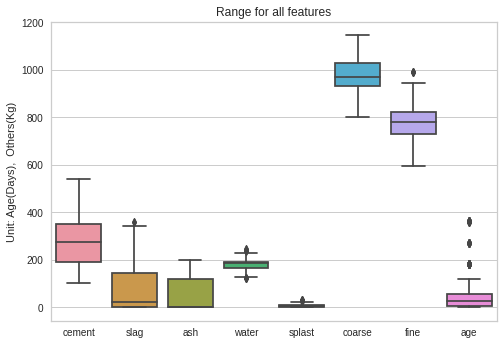

In [59]:
#TODO: add boxplot of features
#plotting boxplot
sns.boxplot(data=X);

#adding title and y-axis label
plt.title("Range for all features")
plt.ylabel('Unit: Age(Days),  Others(Kg)');

### 2.3 Correlation heatmap of features 

To understand if pairs of features are potentially related, contain similar information, pair-wise cross-correlation can be calculated. Models benefit most from un-correlated features.

Using pandas `corr()` method, create the cross-correlations between all features. Plot this cross-correlation object using seaborn `heatmap()` with parameters `vmin=-1, vmax=1, annot=True, cmap='BrBG'`. Add a title.

Pandas `corr()` calculates [Pearson correlation ](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) :
>  It has a value between +1 and −1. A value of +1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.

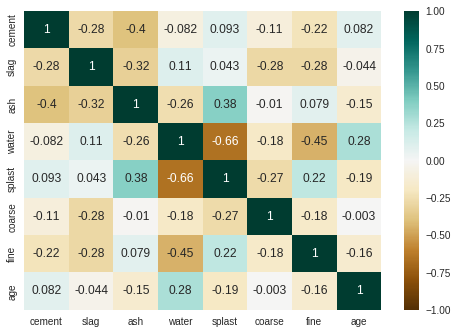

In [62]:
# TODO: add pairwise cross-correlation heatmap of features
# evaluating cross-correlation for all features
X_corr = X.corr()

# plotting cross-correlation on heatmapy
sns.heatmap(data=X_corr, vmin=-1, vmax=1, annot=True, cmap='BrBG');


### 2.4 Histogram of target variable 

To understand if all target values are equally represented in the data, we analyze how many samples of each target value we have available. The histogram of the target vector can visualize this distribution.

Using seaborn `displot()`, plot the histogram of the target vector. Add a title.

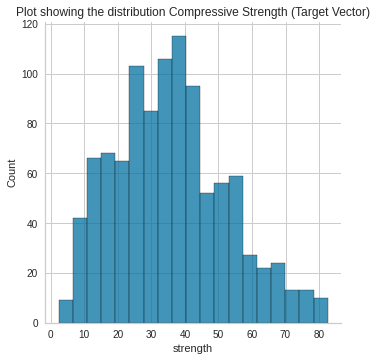

In [61]:
#TODO: Add histogram of targect vector
# using displot() to plot target vector, y
sns.displot(data=y)

# add the title
plt.title("Plot showing the distribution Compressive Strength (Target Vector)");


## 3. Create training and test sets (1 mark)

Using scikit-learn `train_test_split()` with parameters `random_state=37`, `test_size=0.2`, split `X` and `y` into training and test sets

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
# TODO: train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=37, test_size=0.2)

## 4. Compare models using cross-validation (3 marks)

Create a list containing a `LinearRegression()`, `RandomForestRegressor(random_state=64)` and `GradientBoostingRegressor(random_state=79)` objects.

Iterate this list and:
- using `X_train` and `y_train`
- compute the negative root mean-squared error using the `get_regressor_neg_rms()` function
- and print the training and validation scores with **2 decimal places**
- Use 7-fold cross-validation

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [66]:
#TODO: Calling get_regressor_neg_rms() for each model
# creating list containing the models
model_list = [LinearRegression(), RandomForestRegressor(random_state=64), GradientBoostingRegressor(random_state=79)]

# iterating each list to obtain negative rms error
for model in model_list:
    #printing function name
    print(model.__class__.__name__)

    # calculating scores
    score_train, score_test = get_regressor_neg_rms(model, X_train, y_train, 7)

    # printing scores
    print("\tTraining score = {0:.2f}".format(score_train))
    print("\tValidation score = {0:.2f}\n".format(score_test))


LinearRegression
	Training score = -10.29
	Validation score = -10.39

RandomForestRegressor
	Training score = -2.12
	Validation score = -4.97

GradientBoostingRegressor
	Training score = -3.69
	Validation score = -4.98



### *Question 2:* For each of the three models, state if models are potentially over- or underfitting and why (3 marks)

*YOUR ANSWER HERE* 
* Linear Regression: Model is potentially underfitting because training and validation scores are similar and tand have high values (far from 0) indicating high bias.

* RandomForestRegressor: Model is potentially overfitting because training and validation scores are significantly different and have high values (from 0) indicating high variance.

* GradientBoostingRegressor: Model is potentially overfit because training and validation scores are different and have high values ( from 0) indicating high variance.








## 5. Find a better model (3 marks)

Use the `RandomForestRegressor(random_state=64)` and find the best combination of `max_depth` from the list of `[10, 15, 20]`, and `n_estimators` from the list of `[100, 200, 400]`

Use nested for-loops to iterate these two lists:
- using `X_train` and `y_train`
- compute the negative root mean-squared error of the corresponding `RandomForestRegressor(random_state=64)` using the `get_regressor_neg_rms()` function 
- and print the training and validation scores with **2 decimal places**
- Use 7-fold cross-validation

Report the best validation score and the corresponding model

Note: We expect that more trees (larger `n_estimators`) yield better model performance

In [67]:
#TODO: Using nested for loops iterate parameter combinations and print results
# list of max_depth
max_depth = [10, 15, 20]

# list of n_estimators
n_estimators = [100, 200, 400]

print("Printing the score for varying combination of RandomForestRegressor Parameters")
# loop over max_depth_list and n_estimators_list
for depth in max_depth:
    for n in n_estimators:
        # instantiate the model with selected hyper-parameters
        model_RFR = RandomForestRegressor(n_estimators=n, max_depth=depth, random_state=64)
        
        # get the scores on the instantiated model
        score_train, score_test = get_regressor_neg_rms(model_RFR, X_train, y_train, 7)

        # print the hyperparameters used and corresponding scores
        print("max_depth ={}; n_estimators = {} ===> Training Score: {:.2f}; Validation Score: {:.2f} ".format(depth, n, score_train, score_test))

Printing the score for varying combination of RandomForestRegressor Parameters
max_depth =10; n_estimators = 100 ===> Training Score: -2.44; Validation Score: -5.09 
max_depth =10; n_estimators = 200 ===> Training Score: -2.42; Validation Score: -5.06 
max_depth =10; n_estimators = 400 ===> Training Score: -2.41; Validation Score: -5.06 
max_depth =15; n_estimators = 100 ===> Training Score: -2.12; Validation Score: -4.97 
max_depth =15; n_estimators = 200 ===> Training Score: -2.11; Validation Score: -4.93 
max_depth =15; n_estimators = 400 ===> Training Score: -2.10; Validation Score: -4.93 
max_depth =20; n_estimators = 100 ===> Training Score: -2.12; Validation Score: -4.97 
max_depth =20; n_estimators = 200 ===> Training Score: -2.11; Validation Score: -4.93 
max_depth =20; n_estimators = 400 ===> Training Score: -2.09; Validation Score: -4.92 


### *Question 3:* Which combination of `max_depth` and `n_estimators` produced the best validation score? Report both training and validation scores here (2 marks)

*YOUR ANSWER HERE*  

The following resulted in the best validation score:
* max_depth =20; n_estimators = 400 (Validation Score: -4.92)


## 6. Retrain best model (2 marks)

Create a `RandomForestRegressor(random_state=64)` with the best pair of `max_depth` and `n_estimators`, and retrain this model on all training data.

In [69]:
#TODO: retrain the best estimator
# new RFR model with best pair of hyperparameters (max_depth =20; n_estimators = 400)
model = RandomForestRegressor(max_depth=20, n_estimators=400, random_state=64)

# fit the model
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=400, random_state=64)

## 7. Evaluate best model on training and test data
### 7.1 Root mean-squared error and $R^2$ (3 marks)

For the retrained best estimator, print the root mean-squared error (**2 decimal places**) and R-squared (**3 decimal places**) for training and test sets.

In [70]:
from sklearn.metrics import mean_squared_error, r2_score

In [80]:
# TODO: print rms and r-squared for training and test set

# training set prediction
y_train_pred = model.predict(X_train)

# training rms and r2
rms_train = mean_squared_error(y_train, y_train_pred, squared = False)
r2_train = r2_score(y_train, y_train_pred)

# validation set predictoin
y_test_pred = model.predict(X_test)

# test rms and r2
rms_test = mean_squared_error(y_test, y_test_pred, squared = False)
r2_test = r2_score(y_test, y_test_pred)

#printing values
print("Training Values: rms = {:.2f} MPa; R2 = {:.3f}".format(rms_train, r2_train))
print("Validation Values:  rms = {:.2f} MPa; R2 = {:.3f}".format(rms_test, r2_test))

Training Values: rms = 2.00 MPa; R2 = 0.986
Validation Values:  rms = 4.80 MPa; R2 = 0.915


### *Question 4:* How does this test score compare to the polynomial regression and neural network reported in the article? Do we outperform the reported models? Include scores in your answer. (2 marks)

*YOUR ANSWER HERE*
* Our model outperforms the polynomial regression in the article. We have rms of 4.8MPa which is lower than 8.82MPa in the article while we have a r2 of 0.915 which is better than 0.791 obtained in the article.

* Our model performs worse relative to the neural network model in the article. We have rms of 4.8MPa which is higher than 4.32MPa in the article while we have a r2 of 0.915 which is slightly worse than 0.929 obtained in the article.

### 7.2 Predicted vs actual strength plot (1 mark)
Using a scatterplot, show predicted strength on the x axis and actual strength on the y axis with data from the test set. With this plot, we can see where we make errors.

Add a line of unity (diagonal with slope 1 and offset 0). Ideally, all points would be on this line. We look for points being distributed equally around the line of unity.

Add x-axis, y-axis labels including units, and a title.


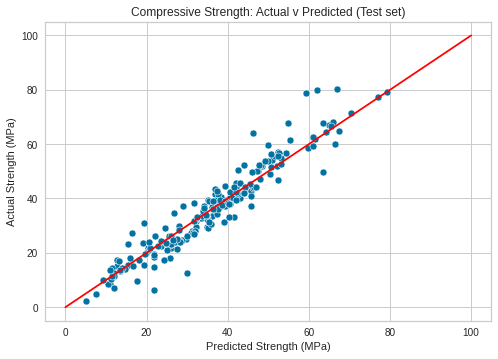

In [81]:
#TODO: predicted-actual plot
#using scatterplot in seaborn
sns.scatterplot(x=y_test_pred, y=y_test)

# adding line of unity
plt.plot([0,100], [0,100], color = 'red')

# adding title and axis labels
plt.title("Compressive Strength: Actual v Predicted (Test set)")
plt.xlabel("Predicted Strength (MPa)");
plt.ylabel("Actual Strength (MPa)");

### 7.3 Residual plot (1 mark)
Using a scatterplot, show predicted strength on the x axis and the *difference* between actual and predicted strength on the y axis with data from the test set. This is an alternative way to see where errors are made.

We look for residuals being distributed equally around the zero horizontal line.

Add x-axis, y-axis labels including units, and a title.



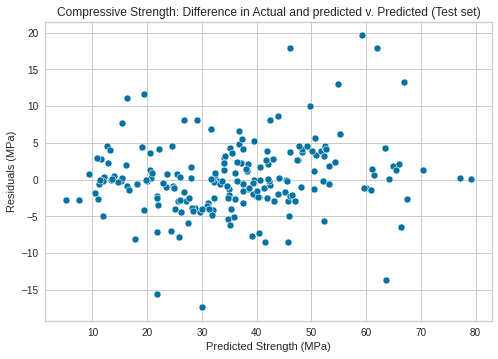

In [82]:
# TODO: Residual plot
#using scatterplot in seaborn
sns.scatterplot(x=y_test_pred, y=y_test-y_test_pred)

# adding title and axis labels
plt.title("Compressive Strength: Difference in Actual and predicted v. Predicted (Test set)")
plt.xlabel("Predicted Strength (MPa)");
plt.ylabel("Residuals (MPa)");

## 8. Conclusion (3 marks)

In conclusion, comment on the following items:
1. Did we find a model that outperforms the polynomial regression reported in the reference article? Explain.
1. Did we find a model that outperforms the neural network reported in the reference article? Explain.
1. What were our assumption about the dataset and train/test split? How do these assumptions affect your conclusions?


*YOUR ANSWER HERE*

1. Yes, our model (RandomForestRegressor with max_depth=20 and  n_estimators=400) outperformed the polynomial regression model reported in the article. We have rms of 4.8MPa which is lower than 8.82MPa in the article while we have a r2 of 0.915 which is better than 0.791 obtained in the article.

2. No, our model performed worse relative to the neural network model reported in the article. We have rms of 4.8MPa which is higher than 4.32MPa in the article while we have a r2 of 0.915 which is worse than 0.929 obtained in the article.

3. We assumed that the yellowbrick dataset was used in the reference article and that 20% of the data served as the test set. Changing the dataset would affect our results and consequently, the conclusions. Also, if the percentage of data used for testing (20%) is changed (to 10% for example), this will also change the model training, result and conclusion.



## 9. Reflection (2 marks)



Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating while working on this assignment.

*ADD YOUR THOUGHTS HERE*

* I liked the ability to use and ease of implementation of multiple models and compare them as used in linear regression, randomforestregressor and gradientboostingregressor. I didn't like the process of manually searching for optimal hyperparameters.

* The ease of visualization using seaborn library was interesting.



# Appendix-A: Bonus - use grid search to find the best model parameters
### (5 potential bonus marks)

## A-0. Workflow overview

In [41]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 KB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=4bfab03e90c0d80bb35636252c30282c40b0f6496c94d9c42aa6cc636be4aa99
  Stored in directory: /root/.cache/pip/wheels/87/75/37/404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


In [ ]:
import mglearn
mglearn.plots.plot_grid_search_overview()

## A-1. Hyperparameter tuning using grid search (2 marks)

The inital cross-validation above showed that both DecisionTree based models might have merit. Next, the hyperparameters are tuned using grid search.

### A-1.1 Grid search for RandomForestRegressor

Perform grid search using `GridSearchCV` for the `RandomForestRegressor(random_state=64)`.

Grid search to use 7-fold cross-validation, and `neg_root_mean_squared_error` as the scoring function.

Use the following hyperparameters and values:
- `'n_estimators': [100, 200, 400]`
- `'max_depth': [ 15, 17, 19, 21]`
- `'max_features': ['auto', 'log2', None]`


In [ ]:
# TODO: Setup grid search for RandomForestRegressor(random_state=64)


In [ ]:
# TODO: perform the grid search by calling fit()


In [ ]:
# TODO: Print the best parameters


In [ ]:
# TODO: Print the best score


### A-1.2 Grid search for gradient boosted tree

Perform grid search using `GridSearchCV` for the `GradientBoostingRegressor(random_state=79)`.

Grid search to use 7-fold cross-validation, and `neg_root_mean_squared_error` as the scoring function.

Use the following hyperparameters and values:
- `'n_estimators': [100, 200, 500]`
- `'max_depth': [1, 3, 5, 7]`
- `'learning_rate': [0.01, 0.1, 1.0]`

In [ ]:
# TODO: Setup grid search for GradientBoostingRegressor(random_state=79)


In [ ]:
# TODO: perform the grid search by calling fit()


In [ ]:
# TODO: Print the best parameters


In [ ]:
# TODO: Print the best score


### *Question A-1:* Which of the two models produces the best score? What is the best score?

*YOUR ANSWER HERE*


## A-2. Retrain best model (1 mark)

Get the best estimator from the two grid searches above and retrain this model on all training data.

In [ ]:
#TODO: retrain the best estimator



## A-3. Model evaluation and conclusion (1 mark)

Repeat steps in Section 7 above for the best model.

Revisit your Question 4.

In [ ]:
#TODO: train and test set scores of retrained best model


In [ ]:
#TODO: predicted-actual plot


In [ ]:
# TODO: Residual plot


### *Question A-4:* How does this test score compare to the polynomial regression and neural network reported in the article? Do we outperform the reported models? (1 mark)

*YOUR ANSWER HERE*
